In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.datasets.mnist import load_data

(X_train, y_train), (X_test, y_test) = load_data()

X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [19]:
print(X_train.max())
print(X_train.min())

X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255
X_test.min(), X_test.max()

255
0


(0.0, 1.0)

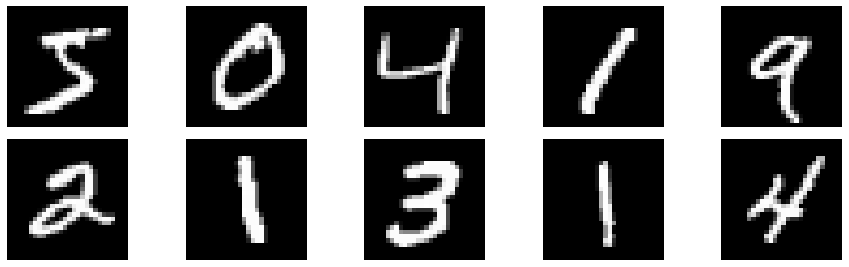

In [20]:
def display_images(data, nrows = 2, ncols = 5, figsize =(16,4)):

    fig, axes = plt.subplots(nrows, ncols, figsize = figsize)

    for i, ax in enumerate(axes.flatten()):
        ax.imshow(X_train[i,:,:], cmap = "gray")
        ax.axis("off")
    
    fig.subplots_adjust(wspace=0, hspace=.1, bottom=0)

display_images(X_train)


In [21]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

def MLP_model(nodes = None, names = None, activations =[]):
    model = Sequential(name ="MLP_model")
    model.add(Flatten(input_shape=(28,28), name = "input_layer"))

    for node, name, activation in zip(nodes, names, activations):
        model.add(Dense(node, name = name, activation = activation))
    
    model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

    return model

model_1 = MLP_model(nodes = [10], names = ["Output_layer"], activations=["softmax"])
model_1.summary()


Model: "MLP_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Flatten)       (None, 784)               0         
                                                                 
 Output_layer (Dense)        (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [22]:
model_1.fit(X_train, y_train, validation_split=1/6, epochs=19, verbose=0)

In [23]:
metrics = pd.DataFrame(model_1.history.history)
metrics.index = range(len(metrics))
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.502810,0.86906,0.309508,0.9136
1,0.316206,0.91134,0.279067,0.9226
2,0.292516,0.91836,0.268162,0.9249
3,0.280679,0.92024,0.265743,0.9268
4,0.273206,0.92282,0.259543,0.9284


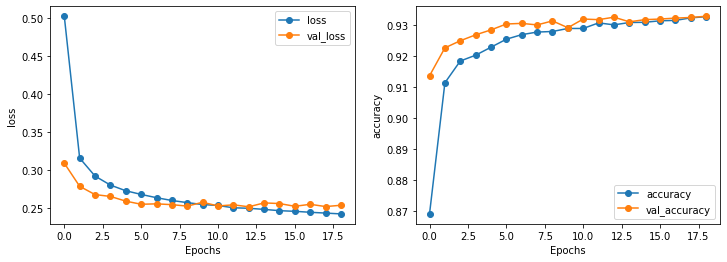

In [24]:
def plot_metrics(df_history, style = "-o"):
    _, axes = plt.subplots(1,2,figsize = (12,4))
    columns = [["loss", "val_loss"], ["accuracy", "val_accuracy"]]
    for ax, col in zip(axes, columns):
        df_history.plot(y=col, xlabel="Epochs", ylabel = col[0], ax = ax, style = style)
        
plot_metrics(metrics)   

In [26]:
model_2 = MLP_model(nodes = [128,128,10], activations=["relu", "relu", "softmax"], names = ["Hidden1", "Hidden2", "Output"])

model_2.summary()

Model: "MLP_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Flatten)       (None, 784)               0         
                                                                 
 Hidden1 (Dense)             (None, 128)               100480    
                                                                 
 Hidden2 (Dense)             (None, 128)               16512     
                                                                 
 Output (Dense)              (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [27]:
model_2.fit(X_train, y_train, validation_split=1/6, epochs=20, verbose=1)

Epoch 1/20
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2523 - accuracy: 0.9260 - val_loss: 0.1234 - val_accuracy: 0.9635
Epoch 2/20
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1019 - accuracy: 0.9691 - val_loss: 0.1269 - val_accuracy: 0.9640
Epoch 3/20
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0719 - accuracy: 0.9777 - val_loss: 0.0871 - val_accuracy: 0.9730
Epoch 4/20
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0548 - accuracy: 0.9827 - val_loss: 0.0963 - val_accuracy: 0.9713
Epoch 5/20
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0433 - accuracy: 0.9857 - val_loss: 0.0855 - val_accuracy: 0.9754
Epoch 6/20
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0345 - accuracy: 0.9889 - val_loss: 0.0897 - val_accuracy: 0.9764
Epoch 7/20
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0286 - accuracy: 0.9904 - val_loss: 0.0894 - val_accuracy:

In [29]:
metrics = pd.DataFrame(model_2.history.history)
metrics.index = range(len(metrics))

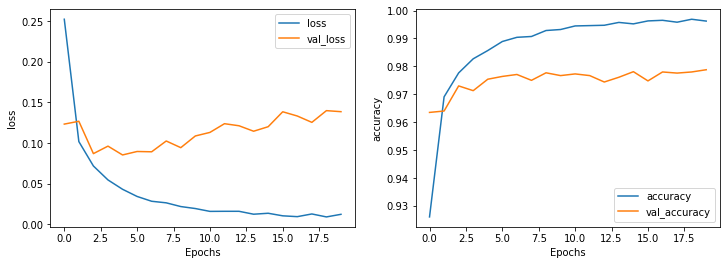

In [30]:
plot_metrics(metrics, style="-")

In [32]:
model_3 = MLP_model(nodes = [128,128,10], activations=["relu", "relu", "softmax"], names = ["Hidden1", "Hidden2", "Output"])

model_3.fit(X_train, y_train, epochs = 5, verbose = 1) #early stopping and train on all training data

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2260 - accuracy: 0.9324
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0967 - accuracy: 0.9702
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0687 - accuracy: 0.9786
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0515 - accuracy: 0.9839
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0412 - accuracy: 0.9862


### Prediction and evaluation

In [37]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = model_3.predict(X_test)
np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()


ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

## Misclassification

C:\Users\fredr\AppData\Local\Temp\ipykernel_41996\3143363280.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  misclasified_indices = np.where(y_pred != y_test)


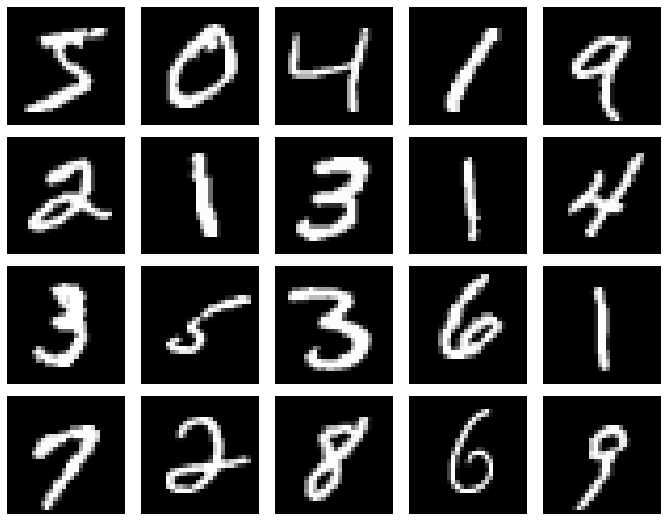

In [42]:
misclasified_indices = np.where(y_pred != y_test)
misclasified_samples = X_test[misclasified_indices]

display_images(misclasified_samples, 4,5, (12,8))